# Decision Trees


In [1]:
import numpy as np
import os
np.random.seed(42)
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris=load_iris()
X=iris.data[:,2:]
y=iris.target
modelo=DecisionTreeClassifier(max_depth=2)
modelo.fit(X,y)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [2]:
import matplotlib.pyplot as plt;from matplotlib.colors import ListedColormap


def visualizar_fronteras(modelo,X,y):

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx,yy= np.meshgrid(np.arange(x_min,x_max,0.05),np.arange(y_min,y_max,0.05))
    
    Z=modelo.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z, cmap='rainbow',alpha=0.8)
    

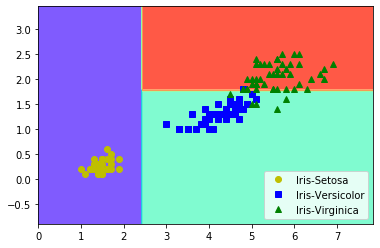

In [3]:
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
plt.legend(loc='lower right')
visualizar_fronteras(modelo,X,y)

In [4]:
modelo.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

### Decision Trees tiene la capacidad de determinar la probabilidad de que cierta muestra pertenezca a una determinada clase. Por ejemplo si se tiene una muestra que tiene una longitud del pétalo de 5 cm y un ancho de 1.5 cm arroja un 90.74% de propabilidad de que pertenezca a la clase 2, es decir Iris-versicolor

# Regularización 

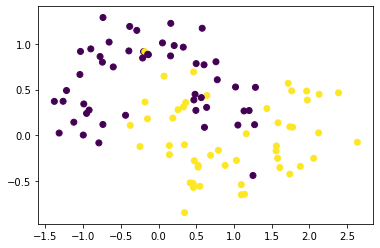

In [5]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=100, noise=0.25, random_state=53)
plt.scatter(X[:,0],X[:,1],c=y)


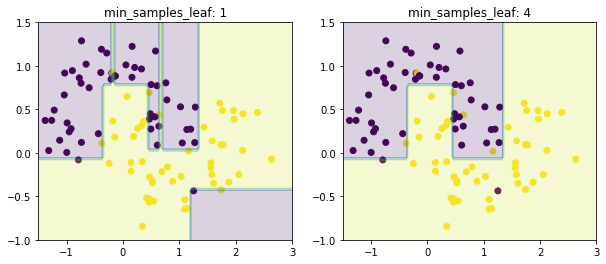

In [6]:
min_samples_leaf=[1,4]

fig,ax=plt.subplots(1,2,figsize=(10,4))

for index,leaf in enumerate(min_samples_leaf):
    
    ax[index].scatter(X[:,0],X[:,1],c=y)
    modelo=DecisionTreeClassifier(min_samples_leaf=leaf)
    modelo.fit(X,y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx,yy=np.meshgrid(np.arange(x_min,x_max,0.05),np.arange(y_min,y_max,0.05))
    
    Z=modelo.predict(np.c_[xx.ravel(),yy.ravel()])
    
    Z=Z.reshape(xx.shape)
    
    ax[index].contourf(xx,yy,Z,cmap='viridis',alpha=0.2)
    
    ax[index].set_title(f'min_samples_leaf: {leaf}')
    ax[index].set_xlim(-1.5,3)
    ax[index].set_ylim(-1,1.5)
    


### En la imágen de la izquierda vemos un modelo no regularizado que evidentemente sufre de overfitting. Por otro lado, el modelo de la derecha aunque no generaliza tan bien es probable que tenga un mejor rendimiento al momento de clasificar conjuntos de datos desconocidos.

# Regression 

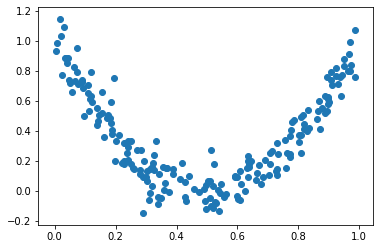

In [7]:
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10
plt.scatter(X,y)

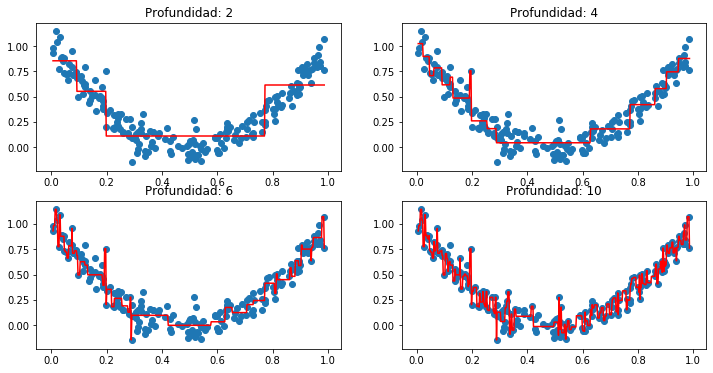

In [8]:
from sklearn.tree import DecisionTreeRegressor;from itertools import product

max_depth=[2,4,6,10]
fig,ax=plt.subplots(2,2,figsize=(12,6))
X_test=np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

for index,depth in zip(product([0,1],[0,1]),max_depth):
    modelo=DecisionTreeRegressor(max_depth=depth)
    modelo.fit(X,y)
    y_pred=modelo.predict(X_test)
    ax[index[0],index[1]].scatter(X,y)
    ax[index[0],index[1]].plot(X_test,y_pred,c='red')
    ax[index[0],index[1]].set_title(f'Profundidad: {depth}')
    


#### A medida que la profundidad del árbol aumenta tiene más libertad de acomdarse al conjunto de datos de entrenamiento y sufrir como consecuencia de overfitting 

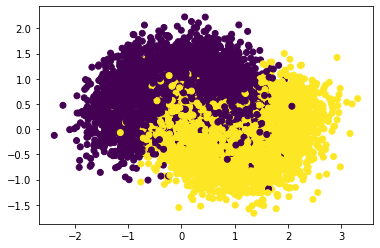

In [9]:
from sklearn.model_selection import train_test_split

X,y=make_moons(n_samples=10000, noise=0.4,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
plt.scatter(X[:,0],X[:,1],c=y)



In [10]:
from sklearn.model_selection import GridSearchCV;from sklearn.pipeline import Pipeline
estimador=Pipeline([('dtc',DecisionTreeClassifier(random_state=42))])

max_leaf_nodes=[{'dtc__max_leaf_nodes':[2,4,5,8,10,15,20]}]

grid=GridSearchCV(estimator=estimador,param_grid=max_leaf_nodes,cv=5,n_jobs=-1)

grid.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('dtc',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                         

In [11]:
from sklearn.metrics import accuracy_score
modelo=grid.best_estimator_
modelo.fit(X_train,y_train)
y_pred=modelo.predict(X_test)
accuracy_score(y_test,y_pred)

0.87

# Creación de un modelo Random Forest desde un modelo Decision Tree

### Creación de 1000 subconjuntos de datos cada uno con 100 muestras, sobre los cuales se entrenarán sendos modelo de DecisionTreeClassifier 

In [12]:
from sklearn.base import clone;from scipy.stats import mode;from sklearn.model_selection import ShuffleSplit
best_model=clone(grid.best_estimator_)

arboles=1000
sub_sets=100

particion=ShuffleSplit(n_splits=arboles,test_size=len(X_train)-sub_sets)

X_train_batches=[]
y_train_batches=[]


for train_idex,test_index in particion.split(X_train):
    X_t=X_train[train_idex]
    y_t=y_train[train_idex]
    X_train_batches.append(X_t)
    y_train_batches.append(y_t)


In [13]:
modeloes=[clone(grid.best_estimator_) for _ in range(arboles)]

In [14]:
for index,clf in enumerate(modeloes):
    clf.fit(X_train_batches[index],y_train_batches[index])

In [15]:
modeloes[1].predict(X_test).shape

(2000,)

In [16]:
matrix_predicciones=np.zeros((arboles,X_test.shape[0]))

for index,clf in enumerate(modeloes):
    matrix_predicciones[index]=clf.predict(X_test)


## Usando hard voting

In [17]:
y_pred,cuenta=mode(matrix_predicciones,axis=0)


In [22]:
y_pred2=y_pred.reshape(y_test.shape)

In [23]:
accuracy_score(y_test,y_pred2)

0.876

### Vemos como se obtiene una leve mejora en el rendimiento del modelo aplicando la técnica de Bagging que en este caso corresponde Random Forest como un caso especial del este último.